 # Tema 4 Sección 2-3  - Problema 14 "con números"
 
>  Un tablón de madera de roble,  bi-empotrada en sus extremos, sostiene su propio peso y una carga distribuida cuyo peso es $m=100$ kg. Resolver la elástica de este sistema hiperestático por el método de la elástica. Son datos del problema la sección del tablón (b,h) y q, E, L e I (ver abajo).

*Nota: Este ejercio es igual al Problema 14 del Tema 4 secciones 2-3, aunque éste incluye valores de las propiedades geométricas y materiales. Aquí solo se resuelve el problema mediante el método de la elástica y de forma numérica. Sirve como ejemplo para la realización de la Práctica 3*



Un tablón de madera de roble tiene las dimensiones siguientes:  L(m)= 2.0 b(m)= 0.05 h(m)= 0.3
y su peso es de  23.1  kg. 

Otros datos: densidad  = 770.0 kg/m**3, y módulo elástico E = 1150000000.0 Pa 

Ecuación de giros = 
 7.72946859903382e-6*A + 7.72946859903382e-6*Ma*x + 3.86473429951691e-6*Ra*x**2 - 0.000777849275362319*x**3 

Ecuación de la elástica = 
 7.72946859903382e-6*A*x + B + 3.86473429951691e-6*Ma*x**2 + 1.28824476650564e-6*Ra*x**3 - 0.00019446231884058*x**4 

Solución constantes de integración {A: 0.0, B: 0.0, Ma: -201.268500000003, Ra: 603.805500000004}
De la solución analítica sabemos que Ra= 603.8055 (N) y Rb= 603.8055 (N)
De la solución analítica sabemos que Ma= -201.26850000000002 (Nm) y Mb= -201.26850000000002 (Nm)


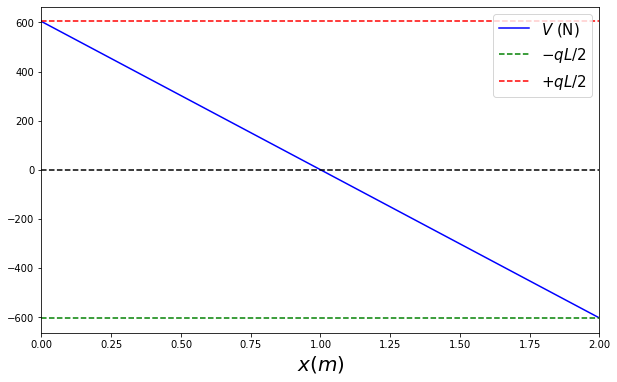

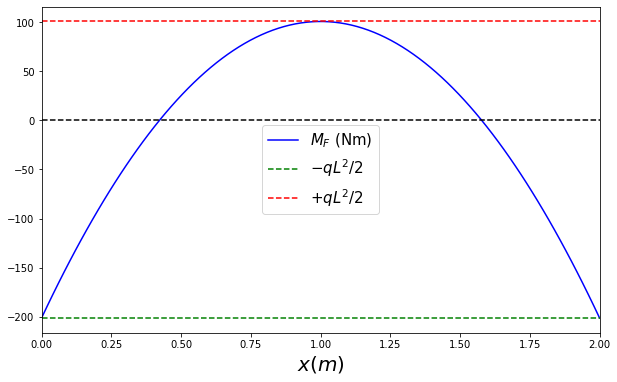

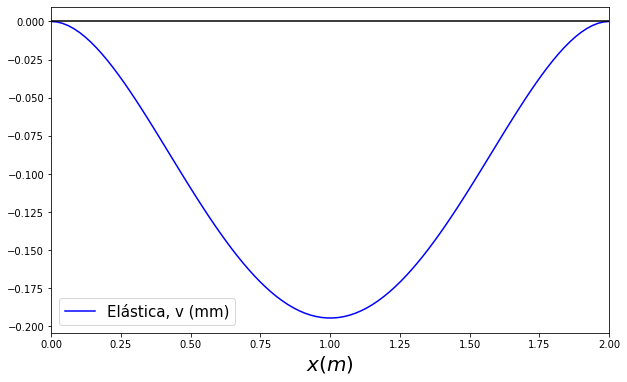

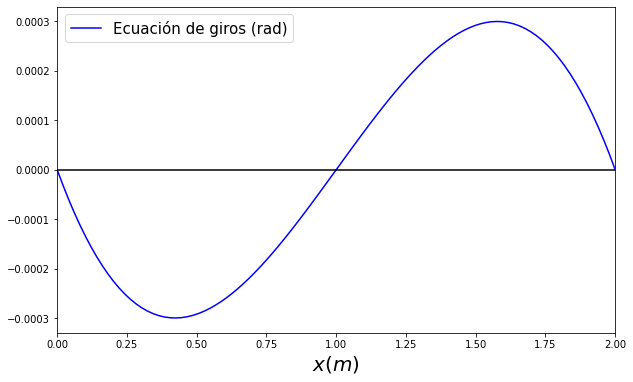

In [5]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

'''
Datos del problema
Nos inventamos también que la sección es rectangular
'''
# Geometría
L = 2.0      # m
b = 0.05     # m
h = 0.3      # m

# Propiedades materiales
den= 770.0    # kg/m**3 (densidad)
E=  115.0e7  # Pa (madera de roble)

# Momento de inercia Iz
I=b*h**3/12

# Cargas
g=9.81                   # m/s**2
masa_madera= den*L*b*h   # kg
masa_carga= 100.0        #kg
q= (masa_madera+masa_carga)*g/L # N/m

print("Un tablón de madera de roble tiene las dimensiones siguientes: ","L(m)=",L,"b(m)=",b,"h(m)=",h)
print("y su peso es de ",round(masa_madera,2)," kg. \n")
print("Otros datos: densidad  =",den,"kg/m**3, y módulo elástico E =",E,"Pa \n")

'''
ESFUERZOS
'''
x=symbols('x')  # x = distancia al origen               
def V1(x,Ra):        
    return  -q*x+Ra
def M1(x,Ra,Ma):        
    return  integrate(V1(x,Ra),x)+Ma

A, B, Ra, Ma=symbols('A B Ra Ma')

'''
Elástica
'''
def ecu_giros(x,A,Ra,Ma):
    return (integrate(M1(x,Ra,Ma),x)+A)/(E*I)

def elastica(x,A,B,Ra,Ma):
    return integrate(ecu_giros(x,A,Ra,Ma),x)+B

print("Ecuación de giros = \n",ecu_giros(x,A,Ra,Ma),"\n")
print("Ecuación de la elástica = \n",elastica(x,A,B,Ra,Ma),"\n")

# Solución de las constantes de integración y las reacciones {A,B,Ra,Ma} 
# La función solve() permite resolver sistemas de ecuaciones. En nuestro caso tenemos 4 incógnitas {A,B,Ra,Ma} y necesitamos
# 4 ecuaciones. Éstas se obtienen como ecuaciones de compatibilidad de la deformación (elástica y ecuación de giros)
# En la función solve podemos entender que cada línea que se incluye es una nueva ecuación igualada a cero. En nuestro ejemplo:
# En la 1ª línea imponemos que la deflexión en x=0 es cero. Esta linea equivale a v(0)=0.
# En la 2ª línea imponemos que la deflexión en x=L es cero. Esta linea equivale a v(L)=0.
# En la 3ª línea imponemos que el giro en x=0 es cero. Esta linea equivale a  θ(0)=0.
# En la 4ª línea imponemos que el giro en x=L es cero. Esta linea equivale a  θ(L)=0.
sol = solve([elastica(x,A,B,Ra,Ma).subs(x,0.0),\
             elastica(x,A,B,Ra,Ma).subs(x,L)  ,\
             ecu_giros(x,A,Ra,Ma).subs(x,0.0) ,\
             ecu_giros(x,A,Ra,Ma).subs(x,L)],dict=False) 

print("Solución constantes de integración", sol)
print("De la solución analítica sabemos que Ra=",q*L/2, "(N) y Rb=",q*L/2,"(N)")
print("De la solución analítica sabemos que Ma=",-q*L**2/12, "(Nm) y Mb=",-q*L**2/12,"(Nm)")
A_sol=sol[A]   # Para utilizar en la gráfica
B_sol=sol[B]   #            ""
Ra_sol=sol[Ra] # Para utilizar en la gráfica
Ma_sol=sol[Ma] #            ""


Xmin= 0.0 ; Xmax=L; nopto=100 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
xab=np.linspace(0.0,Xmax,nopto)
xx=np.linspace(0.0,Xmax,nopto)

# Se definen los "contenedores" de los datos que pintaremos
fab=np.zeros((nopto,1))
vmin=np.zeros((nopto,1))
vmax=np.zeros((nopto,1))
mmin=np.zeros((nopto,1))
mmax=np.zeros((nopto,1))
cero=np.zeros((nopto,1))

#------------------------------------------------------------------------------------------------------------#
'''
Representación gráfica de esfuerzos, elástica y ecuación de giros
'''
#------------------------------------------------------------------------------------------------------------#

# Esfuerzo cortante
V1x=V1(x,Ra).subs(Ra,Ra_sol) 
for i in range(0,nopto):              
    fab[i]=V1x.subs(x,xab[i]) 
    cero[i]=0.0       
    vmin[i]=-q*L/2.0
    vmax[i]=q*L/2.0
    
fig, ax = plt.subplots(figsize=(10,6))                                        
ax.plot(xab,fab, color="blue", label="$V$ (N)")
ax.plot(xx,cero, "k--")
ax.plot(xab,vmin, "g--", label="$-qL/2$")
ax.plot(xab,vmax, "r--", label="$+qL/2$")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,Xmax)
ax.legend(fontsize=15) # Hace que se pinte la leyenda
fig.savefig("V.png")

# Momento flector
M1x=M1(x,Ra,Ma).subs(Ra,Ra_sol).subs(Ma,Ma_sol)
for i in range(0,nopto):              
    fab[i]=M1x.subs(x,xab[i]) 
    cero[i]=0.0       
    mmin[i]=-q*L**2/12.0
    mmax[i]=q*L**2/24.0
    
fig, ax = plt.subplots(figsize=(10,6))                                           
ax.plot(xab,fab, color="blue", label="$M_F$ (Nm)")
ax.plot(xx,cero, "k--")
ax.plot(xab,mmin, "g--", label="$-qL^2/2$")
ax.plot(xab,mmax, "r--", label="$+qL^2/2$")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,Xmax)
ax.legend(fontsize=15) # Hace que se pinte la leyenda
fig.savefig("M.png")

# Elástica
elasticax=elastica(x,A,B,Ra,Ma).subs(A,A_sol).subs(B,B_sol).subs(Ra,Ra_sol).subs(Ma,Ma_sol)
for i in range(0,nopto):              
    fab[i]=elasticax.subs(x,xab[i])*1e3 # en mm
    cero[i]=0.0       
    
fig, ax = plt.subplots(figsize=(10,6))                                          
ax.plot(xab,fab, color="blue", label="Elástica, v (mm)")
ax.plot(xx,cero, color="black")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,Xmax)
ax.legend(fontsize=15) # Hace que se pinte la leyenda
fig.savefig("elastica.png")

# Ecuación de giros
ecu_girosx=ecu_giros(x,A,Ra,Ma).subs(A,A_sol).subs(Ra,Ra_sol).subs(Ma,Ma_sol)
for i in range(0,nopto):              
    fab[i]=ecu_girosx.subs(x,xab[i])
    cero[i]=0.0       
    
fig, ax = plt.subplots(figsize=(10,6))                                        
ax.plot(xab,fab, color="blue", label="Ecuación de giros (rad)")
ax.plot(xx,cero, color="black")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,Xmax)
ax.legend(fontsize=15) # Hace que se pinte la leyenda
fig.savefig("ecuacion_giros.png")